In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import sklearn as sk

Note that the data used in this notebook was acquired by Weather Underground API. The collected data spans from January 1st, 2013 to April 24th, 2017. 

In [2]:
df = pd.read_csv('~/Downloads/DailyDelhiClimateTest.csv')

In [3]:
df['date'] = pd.to_datetime(df['date']) #changing datatype to datetime

In [4]:
df['day'] = df['date'].dt.day
df['hour'] = df['date'].dt.hour
df['month'] = df['date'].dt.month

The code above will help us analyze data by hour, day, and month respectively. It will allow us to see the change in weather both in the short run and the long run.

Here we will look at some baseline characteristics of the data, such as datatype, na values, baseline statistics for each variable, and duplicates. We want to make sure that the data is as clean as possible.

In [5]:
df.dtypes

date            datetime64[ns]
meantemp               float64
humidity               float64
wind_speed             float64
meanpressure           float64
day                      int64
hour                     int64
month                    int64
dtype: object

In [6]:
df.isna().any()

date            False
meantemp        False
humidity        False
wind_speed      False
meanpressure    False
day             False
hour            False
month           False
dtype: bool

In [7]:
df.head()

,date,meantemp,humidity,wind_speed,meanpressure,day,hour,month
0,2017-01-01,15.913043,85.869565,2.743478,59.000000,1,0,1
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778,2,0,1
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333,3,0,1
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000,4,0,1
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333,5,0,1


In [8]:
df.describe()

,meantemp,humidity,wind_speed,meanpressure,day,hour,month
count,114.000000,114.000000,114.000000,114.000000,114.000000,114.0,114.000000
mean,21.713079,56.258362,8.143924,1004.035090,14.894737,0.0,2.421053
std,6.360072,19.068083,3.588049,89.474692,8.495046,0.0,1.104254
min,11.000000,17.750000,1.387500,59.000000,1.000000,0.0,1.000000
25%,16.437198,39.625000,5.563542,1007.437500,8.000000,0.0,1.000000
50%,19.875000,57.750000,8.069444,1012.739316,15.000000,0.0,2.000000
75%,27.705357,71.902778,10.068750,1016.739583,22.000000,0.0,3.000000
max,34.500000,95.833333,19.314286,1022.809524,31.000000,0.0,4.000000


In [9]:
df.duplicated().values.any()

#no duplicates!

False

Now we can make a plot of the independent variable (date) all the other variables to visualize any trends. We can also use this initial plot to check for outliers. As we can see below, mean pressure makes a drastic leap after 2017-01-01, which will need to be addressed. 

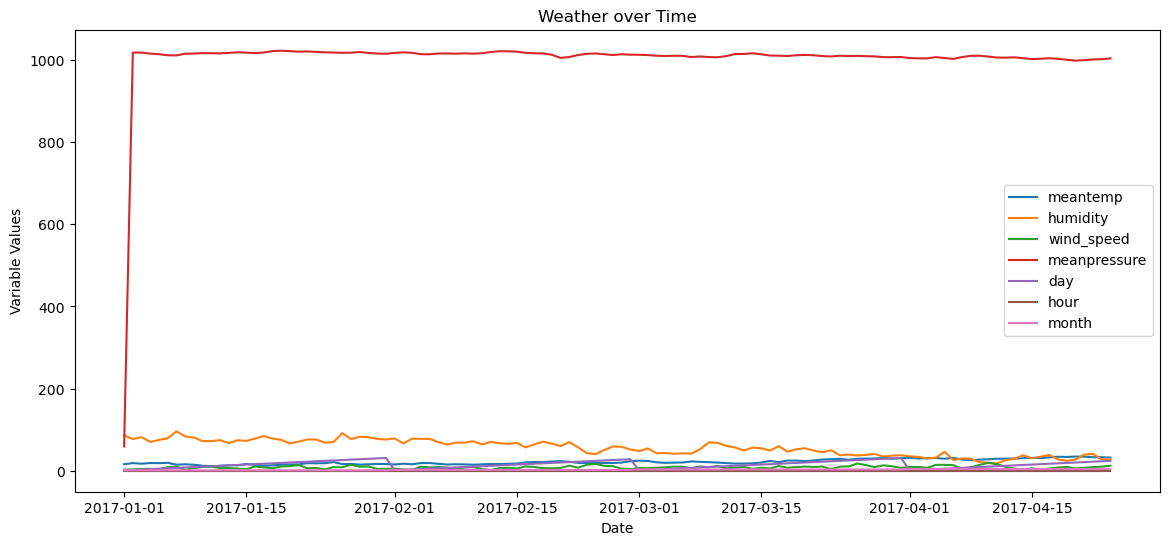

In [10]:
plt.figure(figsize=(14,6))
plt.plot(df['date'], df.iloc[:, 1:])
plt.xlabel('Date')
plt.ylabel('Variable Values')
plt.title('Weather over Time')
plt.legend(df.columns[1:])

#making an initial plot

Looking at the histogram of mean pressure values, we can also see the outlier even clearer. We can drop the outlier meanpressure value quite easily in the code below.

<Axes: xlabel='meanpressure', ylabel='Count'>

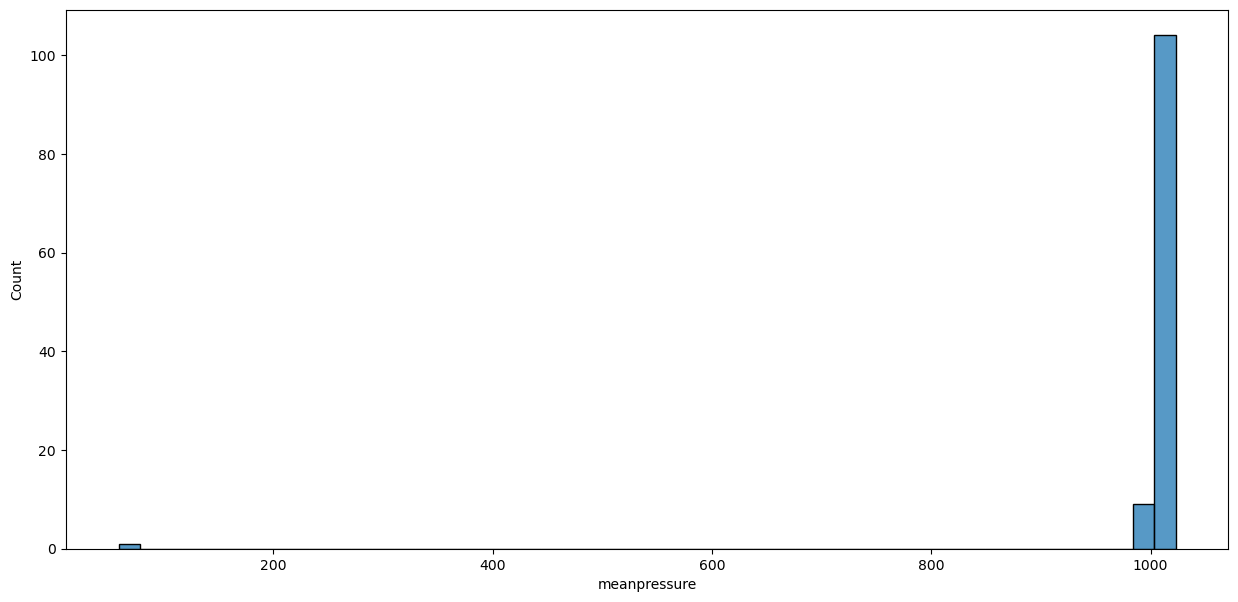

In [11]:
fig, ax = plt.subplots(figsize=(15, 7))

sb.histplot(df['meanpressure'], ax=ax, bins=50)

In [12]:
df.loc[df['meanpressure'] < 200]

#we can see that the outlier is the first entry in the dataset

,date,meantemp,humidity,wind_speed,meanpressure,day,hour,month
0,2017-01-01,15.913043,85.869565,2.743478,59.0,1,0,1


In [13]:
df.drop(0, inplace=True)

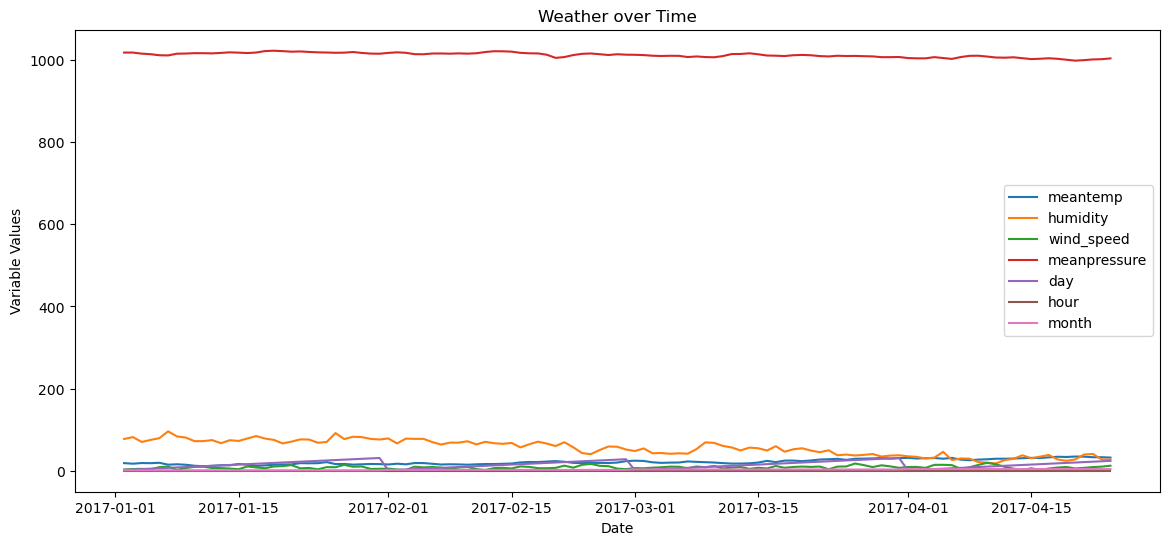

In [14]:
plt.figure(figsize=(14,6))
plt.plot(df['date'], df.iloc[:, 1:])
plt.xlabel('Date')
plt.ylabel('Variable Values')
plt.title('Weather over Time')
plt.legend(df.columns[1:])

Now the graph looks much better, with no egregious spikes.

<Axes: xlabel='meanpressure', ylabel='Count'>

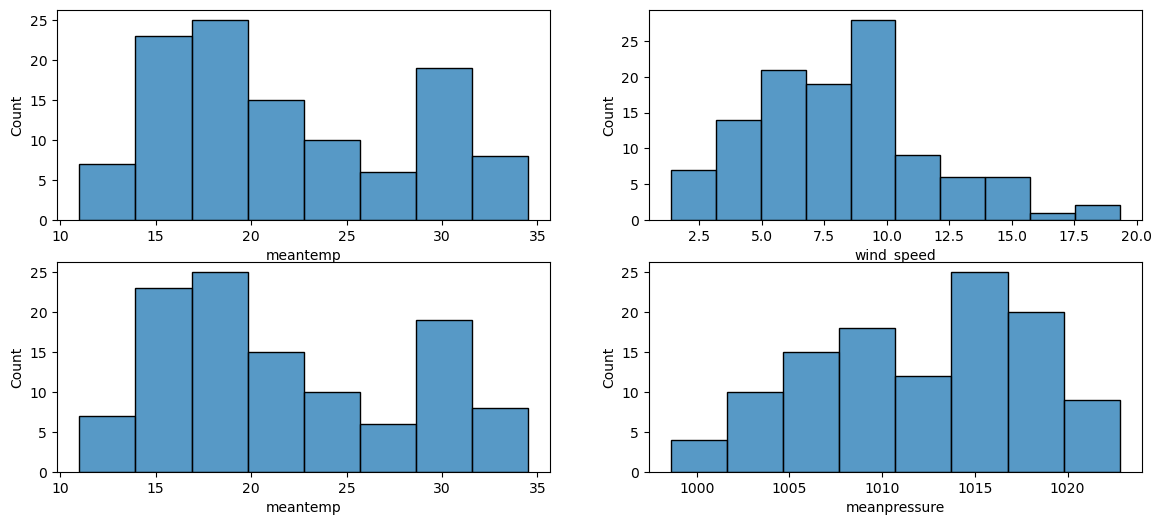

In [15]:
#we can see that here too in the comparison of the histograms

fig, axes = plt.subplots(2,2 , figsize=(14,6))

sb.histplot(df['meantemp'], ax=axes[0,0])
sb.histplot(df['wind_speed'], ax=axes[0,1])
sb.histplot(df['meantemp'], ax=axes[1,0])
sb.histplot(df['meanpressure'], ax=axes[1,1])

We can now use the variables we assigned for different measure of time to plot weather chatacteristics over different time intervals. The one below is baseline one by date. By the plot it is apparent in the long run that humidity decreases, wind speed increases, and mean temperature stays the same. Mean pressure also remains the same but is omitted from the plot, as the discrepancy in values is too large, making the change of all variables difficult to visualize.

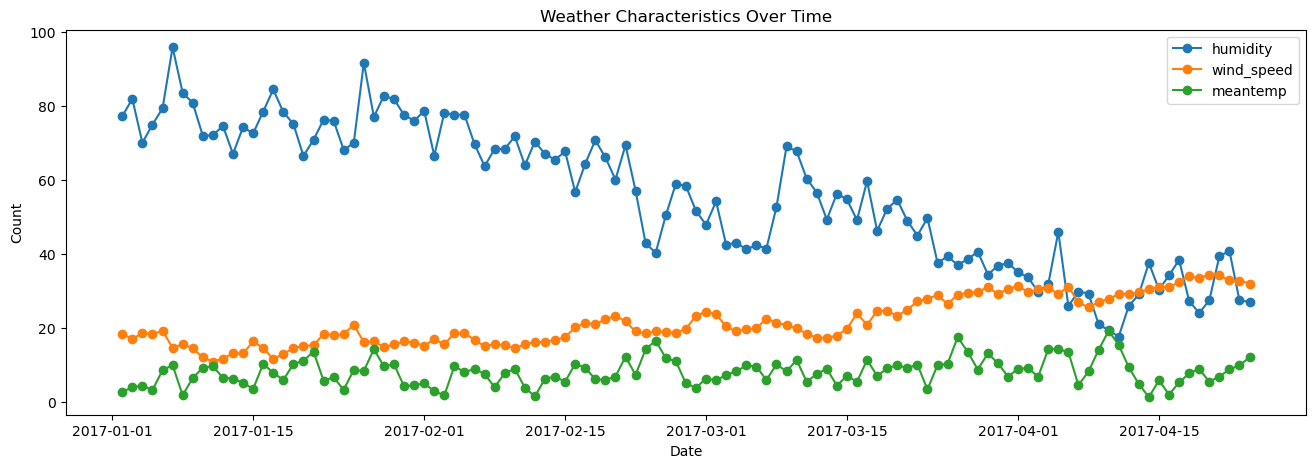

In [16]:
plt.figure(figsize=(16,5))

plt.plot(df['date'], df['humidity'], marker='o')
plt.plot(df['date'], df['meantemp'], marker='o')
plt.plot(df['date'], df['wind_speed'], marker = 'o')
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Weather Characteristics Over Time')

plt.legend(df[['humidity', 'wind_speed', 'meantemp']])

plt.show()

In [17]:
corr = df.iloc[:,1:5].corr()

<Axes: >

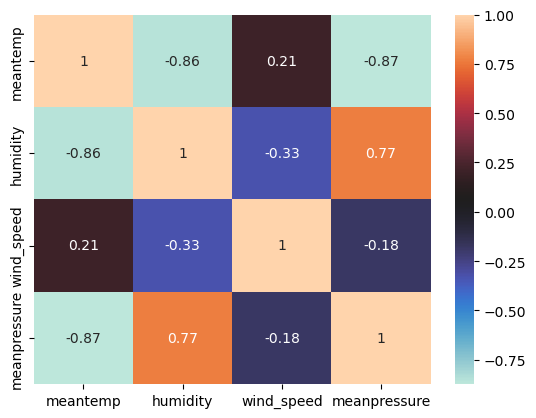

In [18]:
#checking out the correlation between the variables with a heatmap

sb.heatmap(corr, cmap='icefire', annot=True)

Using the seaborn library, we can make a correlation matrix, then input it into a heatmap to see how the variables are correlated with one another. We can also use the corr defined above to perform PCA mathematically.

In [19]:
df.head()

,date,meantemp,humidity,wind_speed,meanpressure,day,hour,month
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778,2,0,1
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333,3,0,1
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000,4,0,1
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333,5,0,1
5,2017-01-06,19.318182,79.318182,8.681818,1011.772727,6,0,1


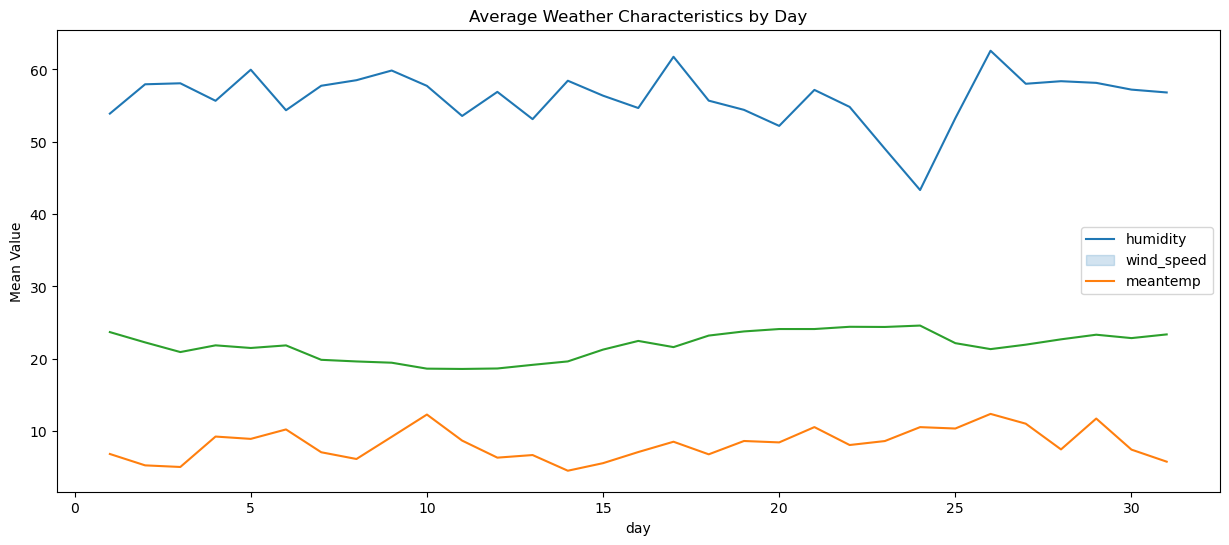

In [20]:
plt.figure(figsize=(15,6))

sb.lineplot(df.groupby(by='day')['humidity'].mean())
sb.lineplot((df.groupby(by='day')['wind_speed']).mean())
sb.lineplot((df.groupby(by='day')['meantemp']).mean())

plt.ylabel('Mean Value')
plt.title('Average Weather Characteristics by Day')
            
plt.legend(['humidity', 'wind_speed', 'meantemp'])

#plotting the mean value of each weather characteristic by day, month, and hour

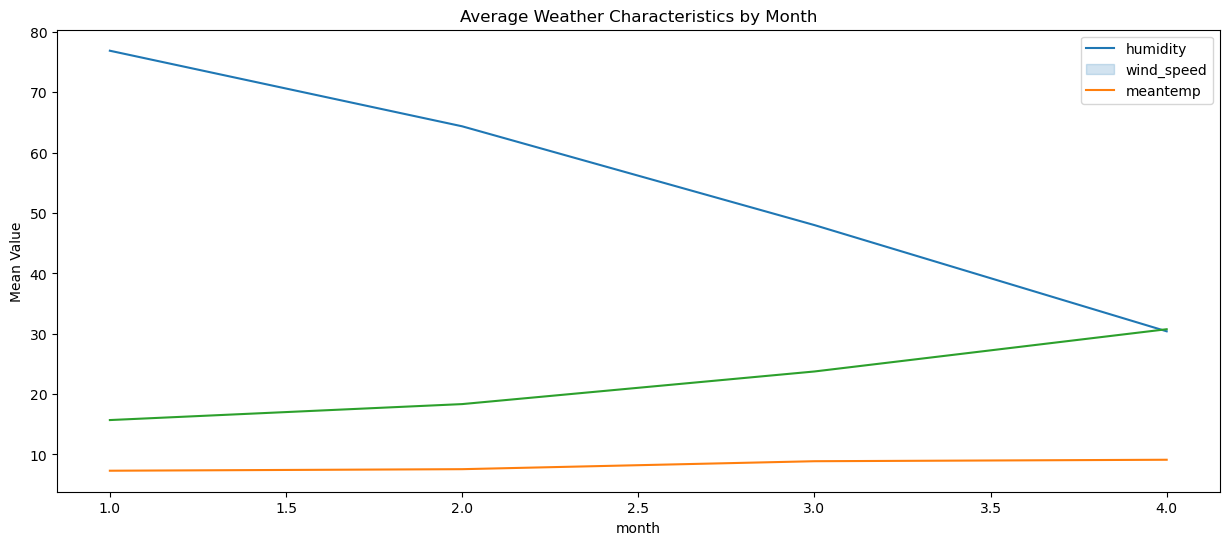

In [21]:
plt.figure(figsize=(15,6))

sb.lineplot(df.groupby(by='month')['humidity'].mean())
sb.lineplot((df.groupby(by='month')['wind_speed']).mean())
sb.lineplot((df.groupby(by='month')['meantemp']).mean())

plt.ylabel('Mean Value')
plt.title('Average Weather Characteristics by Month')
            
plt.legend(['humidity', 'wind_speed', 'meantemp'])

Note that the weather plot could be misleading. The high variability steams from the differences in weather characteristics from different months that are grouped together by the same day. By month however, we can see that the changes in the weather characteristics are more gradual. Again, this makes sense due to seasonal changes in weather.

{'whiskers': [<matplotlib.lines.Line2D at 0x249267cf290>,
 'caps': [<matplotlib.lines.Line2D at 0x249267d8950>,
 'boxes': [<matplotlib.lines.Line2D at 0x249267c0090>],
 'medians': [<matplotlib.lines.Line2D at 0x249267da050>],
 'fliers': [<matplotlib.lines.Line2D at 0x249267daad0>],
 'means': []}

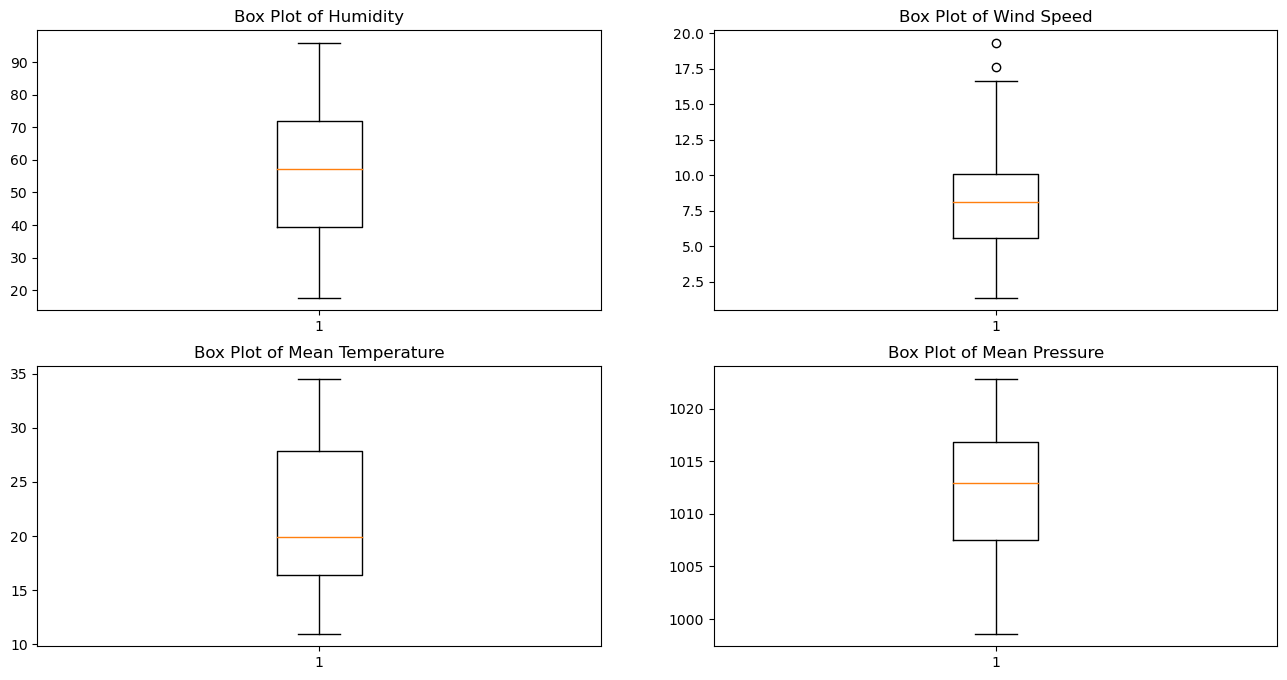

In [22]:
fig, axes = plt.subplots(2, 2, figsize=(16, 8))

axes[0,0].boxplot(df['humidity'])
axes[0, 0].set_title('Box Plot of Humidity')

axes[0, 1].set_title('Box Plot of Wind Speed')
axes[0,1].boxplot(df['wind_speed'])

axes[1, 0].set_title('Box Plot of Mean Temperature')
axes[1,0].boxplot(df['meantemp'])

axes[1,1].set_title('Box Plot of Mean Pressure')
axes[1,1].boxplot(df['meanpressure'])

#Making some boxplots to see the spread and outliers of the dataframe once more

Based on the output, only a few outliers remain for wind speed. Unlike the mean pressure outliers, we can see that they are not too egregious so they should not affect the overall data significantly. We can still look and see where the outliers occur in the first two lines of the cell below.

In [23]:
df #visualizing the dataframe again

,date,meantemp,humidity,wind_speed,meanpressure,day,hour,month
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778,2,0,1
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333,3,0,1
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000,4,0,1
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333,5,0,1
5,2017-01-06,19.318182,79.318182,8.681818,1011.772727,6,0,1
...,...,...,...,...,...,...,...,...
109,2017-04-20,34.500000,27.500000,5.562500,998.625000,20,0,4
110,2017-04-21,34.250000,39.375000,6.962500,999.875000,21,0,4
111,2017-04-22,32.900000,40.900000,8.890000,1001.600000,22,0,4
112,2017-04-23,32.875000,27.500000,9.962500,1002.125000,23,0,4


In [24]:
from sklearn.linear_model import LinearRegression

#practicing linear regression

In [25]:
lr = LinearRegression()

In [26]:
lr.fit(df.drop(['date','meantemp'], axis=1), df['meantemp'])

LinearRegression()

In this case we are fitting the linear model to see how all non-time based variables affect mean temperature.

In [27]:
from sklearn.metrics import mean_absolute_error

from sklearn.metrics import mean_squared_error

from sklearn.metrics import r2_score

#importing more functions for summary statistics

In [28]:
print('Score:', lr.score(df.drop(['date','meantemp'], axis=1), df['meantemp']))

#there is a positive correlation between wind speed, humidity, month, hour, day, and meantemp.

Score: 0.8758058539987387


In [29]:
pred = lr.predict((df.drop(['date','meantemp'], axis=1)))

In [30]:
mean_squared_error(pred, df['meantemp'])

#when prediciting future values for meantemp, the mean squared error is roughly 5 degrees.

4.9864168984238635

In [31]:
mean_absolute_error(pred, df['meantemp'])

#taking the square root of the previous cell

1.8345823989581764

To summarize, we cleaned that weather data provided by Weather Underground API to obtain more accurate statistics. Then we made histograms and boxplots to see the center, shape, and spread of humidity, wind speed, mean temperature, and mean pressure over the timespan of the data. We then made a correlation heatmap to visualize the correlation between all the variables to see how they affect the total variability. By using the three different measurements of time, we carried out visualizations of the short term and long term changes of weather to examine the its general behavior and make educated predictions. Finally, we imported a linear regression library to get predictions based on that model. This exploratory exercise provided good practice in general data cleaning and visualization, and helped me get comfortable with pandas and other libraries in python. 